Point: To Create Difference Bar Charts

In [23]:
%pylab inline
import os
import time
import glob
import operator
import xarray as xr
import itertools
import summa_plot as sp
import pysumma.Simulation
import scipy.stats
import matplotlib as mpl
from pprint import pprint
from functools import reduce
from scipy.special import psi, inv_boxcox
from jupyterthemes import jtplot
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import importlib
from jupyterthemes import jtplot
importlib.reload(pysumma.Simulation)

jtplot.style('grade3', fscale=1.6)
jtplot.figsize(x=36, y=20)
mpl.rcParams['figure.figsize'] = (18, 10)

Populating the interactive namespace from numpy and matplotlib


/pool0/home/tushark/miniconda3/envs/default/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['bar']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
file_path = '/pool0/data/tushark/pysumma/data/'

In [3]:
Loobos_Ballberry = pd.read_csv(file_path + 'Loobos_output_difTrans_exponential_BallBerry.csv')

In [4]:
Loobos_Ballberry

,Unnamed: 0,precipitation,temperature,soil_moisture,latent_heat,sensible_heat,shortwave
0,precipitation,2.057388,0.000000,0.000000,0.000000,0.000000,0.000000
1,temperature,0.000000,3.788959,0.000000,0.000000,0.026468,0.000000
2,soil_moisture,0.000000,0.000000,5.167431,0.109558,0.206509,0.000000
3,latent_heat,0.000000,0.000000,0.000000,5.604167,0.341977,0.336085
4,sensible_heat,0.000000,0.000000,0.000000,0.288460,5.515659,0.416777
5,shortwave,0.000000,0.000000,0.000000,0.304165,0.432144,6.066100


In [5]:
Loobos_Jarvis = pd.read_csv(file_path + 
                            'Loobos_output_difTrans_exponential_Jarvis.csv')
Loobos_obs = pd.read_csv(file_path + 'Loobos_obs_0_10.csv')

In [6]:
Loobos_Jarvis

,Unnamed: 0,precipitation,temperature,soil_moisture,latent_heat,sensible_heat,shortwave
0,precipitation,2.553979,0.000000,0.000000,0.000000,0.000000,0.000000
1,temperature,0.000000,3.713971,0.000000,0.000000,0.000000,0.000000
2,soil_moisture,0.000000,0.000000,5.405647,0.165222,0.300521,0.177078
3,latent_heat,0.000000,0.000000,0.000000,5.704583,0.259015,0.417832
4,sensible_heat,0.000000,0.000000,0.000000,0.208842,5.656108,0.287171
5,shortwave,0.000000,0.000000,0.000000,0.314203,0.325102,5.918826


In [7]:
Loobos_obs

,Unnamed: 0,precipitation,temperature,soil_moisture,latent_heat,sensible_heat,shortwave
0,precipitation,2.028466,0.000000,0.00000,0.000000,0.000000,0.000000
1,temperature,0.000000,3.830034,0.00000,0.090461,0.138308,0.000000
2,soil_moisture,0.000000,0.000000,2.68596,0.000000,0.000000,0.000000
3,latent_heat,0.000000,0.000000,0.00000,5.100297,0.432653,0.270708
4,sensible_heat,0.000000,0.000000,0.00000,0.431068,5.526166,0.293961
5,shortwave,0.000000,0.000000,0.00000,0.363181,0.459009,6.208670


In [8]:
Loobos_obs['sensible_heat'] - Loobos_obs['soil_moisture']

0    0.000000
1    0.138308
2   -2.685960
3    0.432653
4    5.526166
5    0.459009
dtype: float64

In [9]:
obs_minus_ballberry = Loobos_obs['latent_heat'] - Loobos_Ballberry['latent_heat']

In [10]:
obs_minus_jarvis = Loobos_obs['latent_heat'] - Loobos_Jarvis['latent_heat']

In [11]:
ballberry_minus_jarvis = Loobos_Ballberry['latent_heat'] - Loobos_Jarvis['latent_heat']

In [12]:
obs_minus_ballberry, ballberry_minus_jarvis, obs_minus_jarvis

(0    0.000000
 1    0.090461
 2   -0.109558
 3   -0.503870
 4    0.142608
 5    0.059016
 Name: latent_heat, dtype: float64, 0    0.000000
 1    0.000000
 2   -0.055664
 3   -0.100416
 4    0.079618
 5   -0.010038
 Name: latent_heat, dtype: float64, 0    0.000000
 1    0.090461
 2   -0.165222
 3   -0.604286
 4    0.222226
 5    0.048977
 Name: latent_heat, dtype: float64)

In [13]:
def reorder(given_list):
    myorder=[3,1,2,4,5]
    return [ given_list[i] for i in myorder]

In [14]:
obs_minus_ballberry_new = reorder(obs_minus_ballberry)
obs_minus_jarvis_new = reorder(obs_minus_jarvis)
ballberry_minus_jarvis_new = reorder(ballberry_minus_jarvis)

In [15]:
obs_minus_jarvis_new

[-0.60428563686999937,
 0.090461374400899991,
 -0.165222201293,
 0.222226116886,
 0.048977454272000009]

In [16]:
ballberry_minus_jarvis_new

[-0.10041607093999971,
 0.0,
 -0.055663814139000012,
 0.079618135845000021,
 -0.010038297003999996]

In [17]:
obs_minus_ballberry_new

[-0.50386956592999965,
 0.090461374400899991,
 -0.10955838715399999,
 0.14260798104099998,
 0.059015751276000006]

In [80]:
onsliceObj

slice(None, 1, None)

In [87]:
obs_minus_ballberry_new = obs_minus_ballberry[3:3].append(obs_minus_ballberry[1:3]).append(obs_minus_ballberry[4:5])

In [18]:
obs_minus_ballberry_new

[-0.50386956592999965,
 0.090461374400899991,
 -0.10955838715399999,
 0.14260798104099998,
 0.059015751276000006]

In [19]:
x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18]

In [20]:
len(obs_minus_ballberry)

6

In [21]:
bar = []
for i in range(1, 6):
    bar.append(obs_minus_ballberry[i])
    bar.append(obs_minus_jarvis[i])
    bar.append(ballberry_minus_jarvis[i])

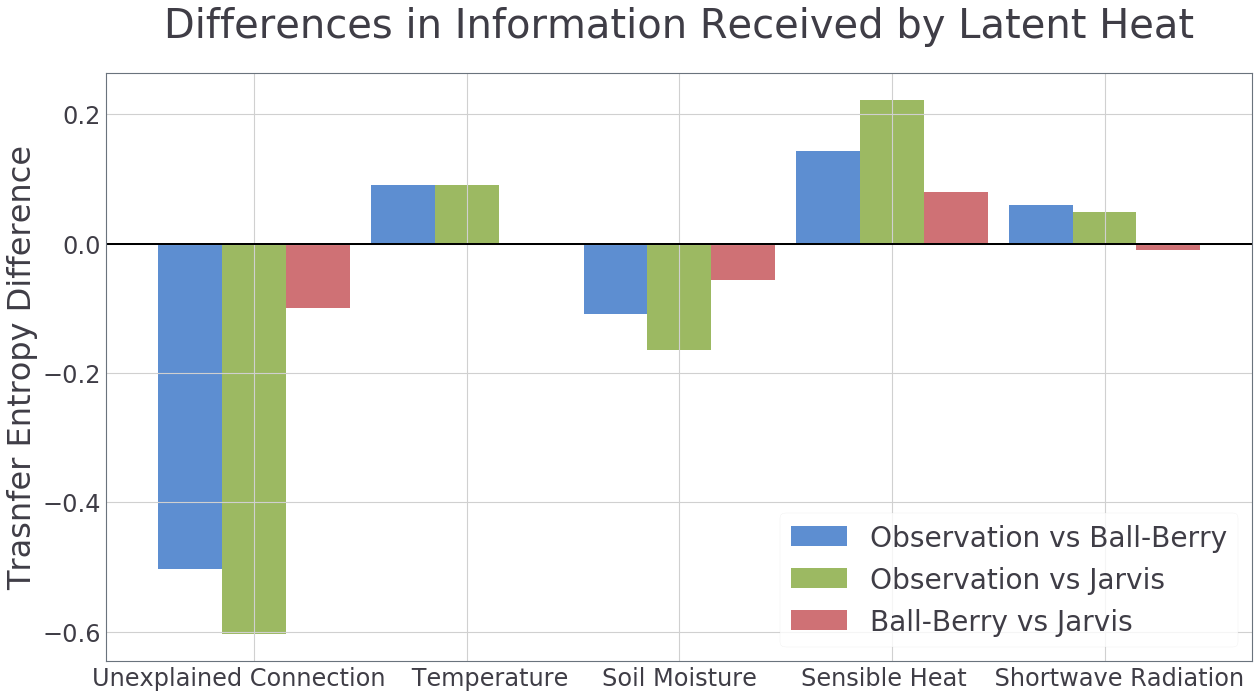

In [24]:
# data to plot
n_groups = 5
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, obs_minus_ballberry_new, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Observation vs Ball-Berry')
 
rects2 = plt.bar(index + bar_width, obs_minus_jarvis_new, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Observation vs Jarvis')

rects2 = plt.bar(index + (2*bar_width), ballberry_minus_jarvis_new, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Ball-Berry vs Jarvis')
 
#plt.xlabel('Model Variables', fontsize=32)
plt.axhline(0, linewidth=2, color='black')
plt.ylabel('Trasnfer Entropy Difference', fontsize=32)
plt.title('Differences in Information Received by Latent Heat', fontsize=40, y=1.05)
plt.xticks(index + bar_width, ('Unexplained Connection    ', '      Temperature', 'Soil Moisture',
                               'Sensible Heat  ', '    Shortwave Radiation'), fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='lower right', fontsize=28)
 
plt.tight_layout()
plt.show()
fig.savefig('../data/bar_graph.png')

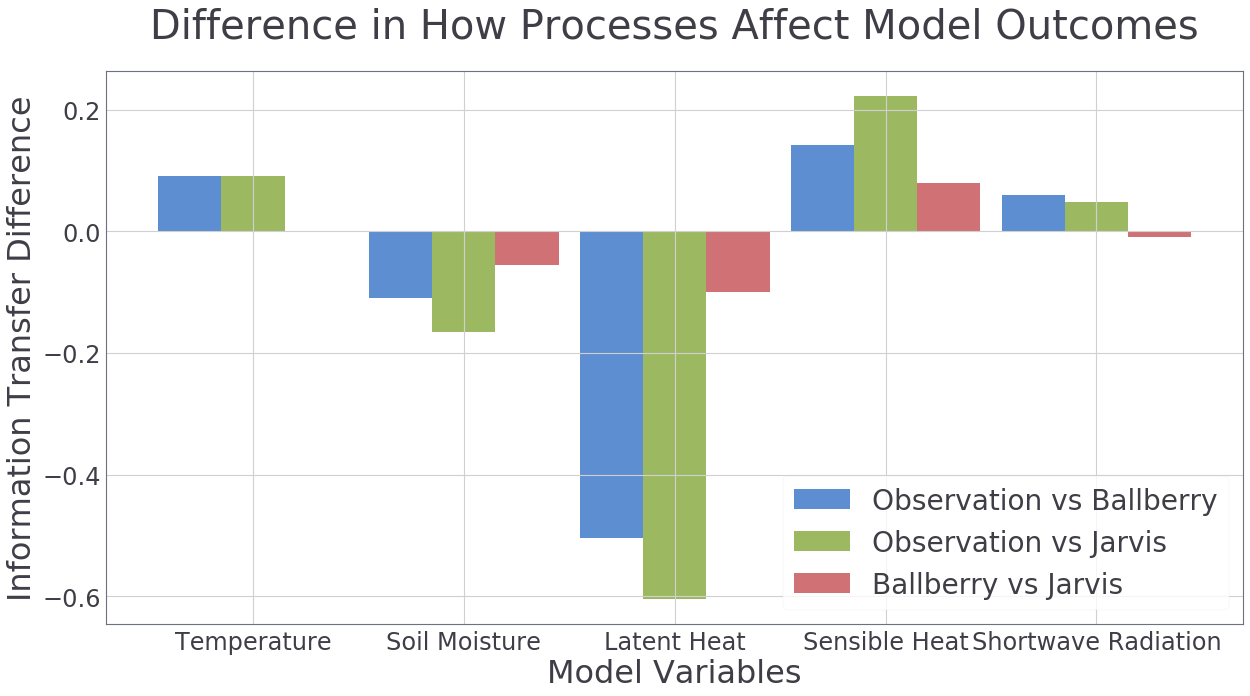

In [27]:
# data to plot
n_groups = 5
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, obs_minus_ballberry[1:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Observation vs Ballberry')
 
rects2 = plt.bar(index + bar_width, obs_minus_jarvis[1:], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Observation vs Jarvis')

rects2 = plt.bar(index + (2*bar_width), ballberry_minus_jarvis[1:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Ballberry vs Jarvis')
 
plt.xlabel('Model Variables', fontsize=32)
plt.ylabel('Information Transfer Difference', fontsize=32)
plt.title('Difference in How Processes Affect Model Outcomes', fontsize=40, y=1.05)
plt.xticks(index + bar_width, ('Temperature', 'Soil Moisture', 'Latent Heat',
                               'Sensible Heat', 'Shortwave Radiation'), fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='lower right', fontsize=28)
 
plt.tight_layout()
plt.show()
fig.savefig('../data/bar_graph.png')

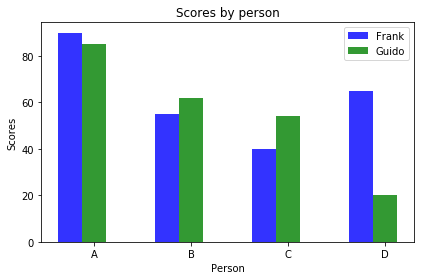

In [40]:
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [39]:
index

array([0, 1, 2, 3, 4, 5])